In [1]:
#Question 3 - Final Project
#Karan Gandhi

#Augmented Reality - For this question the approach used is as follows - 
#1) In the first step we perform Camera Calibration with a checkerboard in order to find out parameters - camera matrix, distortion coefficients
#2) These parameters are used to generate properties like its pose, or how the object is situated in space, like how it is rotated, how it is displaced etc
#3) Since we know how the object lies in the space, we can draw some 2D diagrams in it to simulate the 3D effect
#4) Post which we create a wireframe model of a cube
#5) To map an image to one of the planes of the cube we use Homography and Image Warping
#The following tutorials are refered to for this question - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html & https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_pose/py_pose.html


#Implementation - So to find pattern in chess board, we use the function, cv2.findChessboardCorners(). We also need to pass what kind of pattern we are looking, like 8x8 grid, 5x5 grid etc. In this example, we use 7x6 grid. (Normally a chess board has 8x8 squares and 7x7 internal corners). It returns the corner points and retval which will be True if pattern is obtained. These corners will be placed in an order (from left-to-right, top-to-bottom)




import numpy as np
import cv2
import glob

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('checkerboards/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()


In [2]:
#Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [3]:

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
a=5
b=4
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((a*b,3), np.float32)
objp[:,:2] = np.mgrid[0:a,0:b].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('checkerboards/*.jpg')
count = 0;
for fname in images:
    count +=1
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (a,b),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        # print(count,'Detect success')

        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
    else:
        print(count,'Detect fail')
        

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
K = mtx

print('\n K')
print(K)
print('\n Dist')
print(dist)

1 Detect fail
2 Detect fail
4 Detect fail
6 Detect fail
7 Detect fail
8 Detect fail
9 Detect fail
10 Detect fail
11 Detect fail
12 Detect fail
13 Detect fail
14 Detect fail
15 Detect fail

 K
[[541.29975159   0.         354.35090375]
 [  0.         541.43090411 230.49393329]
 [  0.           0.           1.        ]]

 Dist
[[-2.86899396e-01  6.78484892e-01 -1.31632271e-04  9.28000283e-04
  -4.96155981e+00]]


In [4]:
i = 0
R = cv2.Rodrigues(rvecs[i])
t = tvecs[i]
T = np.hstack((R[i], t))
print('T')
print(T)
print('M')
M=np.dot(K, T)
print(M)

T
[[ 0.23773359  0.95557807  0.17422195 -1.65210124]
 [-0.91326903  0.15881487  0.37512334  2.52471882]
 [ 0.3307906  -0.24829093  0.91045548 11.29707776]]
M
[[ 2.45901084e+02  4.29272056e+02  4.16927023e+02  3.10884772e+03]
 [-4.18226847e+02  2.87577234e+01  4.12957836e+02  3.97086868e+03]
 [ 3.30790605e-01 -2.48290933e-01  9.10455484e-01  1.12970778e+01]]


In [5]:
img = cv2.imread('checkerboards/left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [6]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

In [7]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

In [8]:
#Given a pattern image, we can utilize the above information to calculate its pose, or how the object is situated in space, like how it is rotated, how it is displaced etc. For a planar object, we can assume Z=0, such that, the problem now becomes how camera is placed in space to see our pattern image. So, if we know how the object lies in the space, we can draw some 2D diagrams in it to simulate the 3D effect.


import cv2 as cv

#Rendering a cube

def draw(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw ground floor in green
    img = cv.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    # draw top layer in red color
    img = cv.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

In [27]:

criteria = (cv2.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])

pts_plane = np.float32([[0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3]])

im_src = cv.imread('checkerboards/apple6.jpg')

w,h,_ = im_src.shape

print(im_src.shape)

pts_src = np.float32([[0,0],[2031,0],[2031,1649],[0,1649]]) 

(1108, 1920, 3)


In [50]:
for fname in glob.glob('checkerboards/left*.jpg'):
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (7,6),None)
   

In [51]:
    if ret == True:
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret,rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
        pts_dst,_ = cv.projectPoints(pts_plane, rvecs, tvecs, mtx, dist)
        h, status = cv.findHomography(pts_src,pts_dst)
        img = draw(img,corners2,imgpts)
        im_out = cv.warpPerspective(im_src, h, (img.shape[1],img.shape[0]))
        cv.imshow('img',img+im_out)
        k = cv.waitKey(10) & 0xFF
        if k == ord('s'):
            cv.imwrite(fname[:6]+'.png', img)
cv.destroyAllWindows()

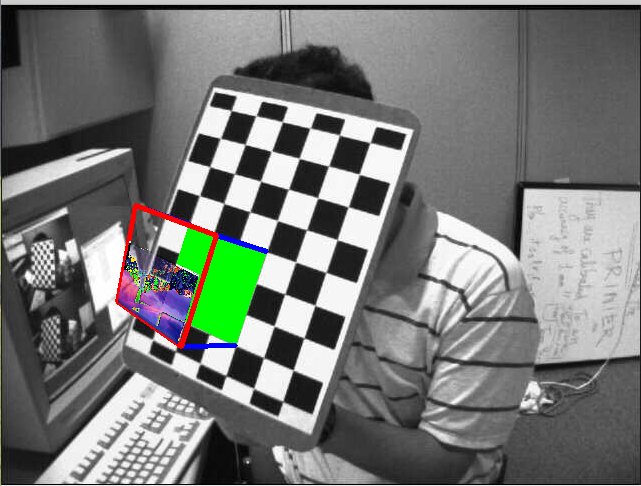

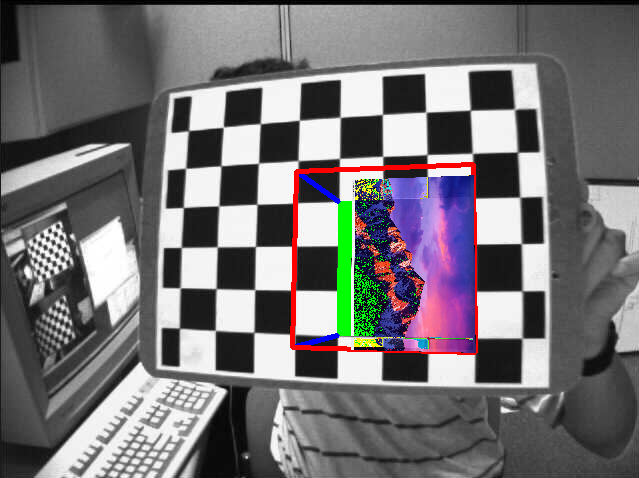

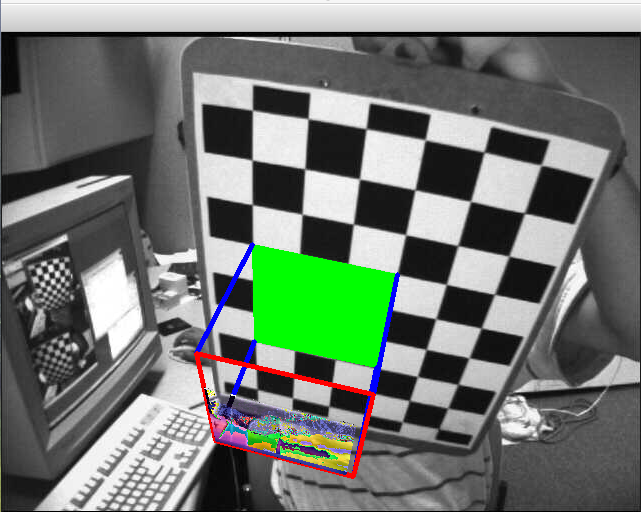

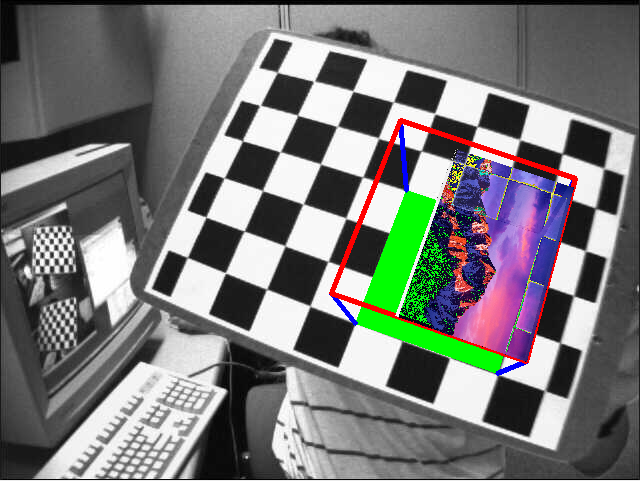

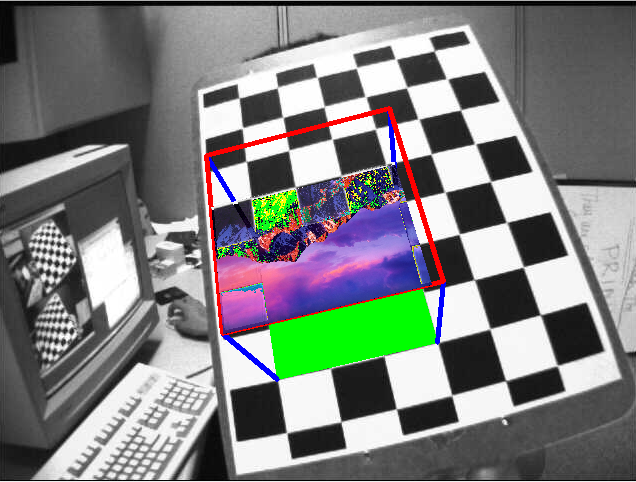

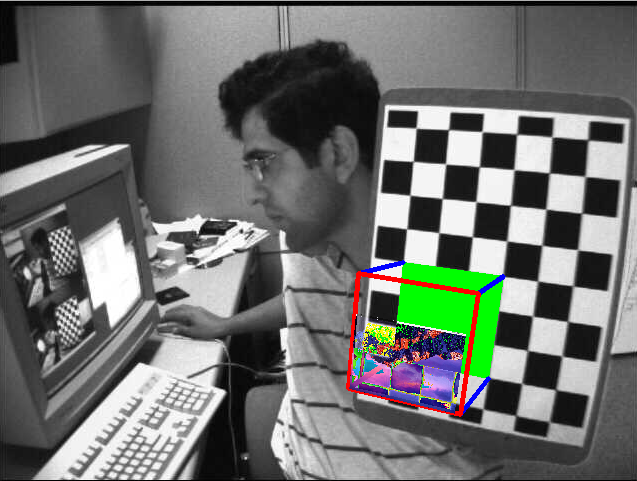

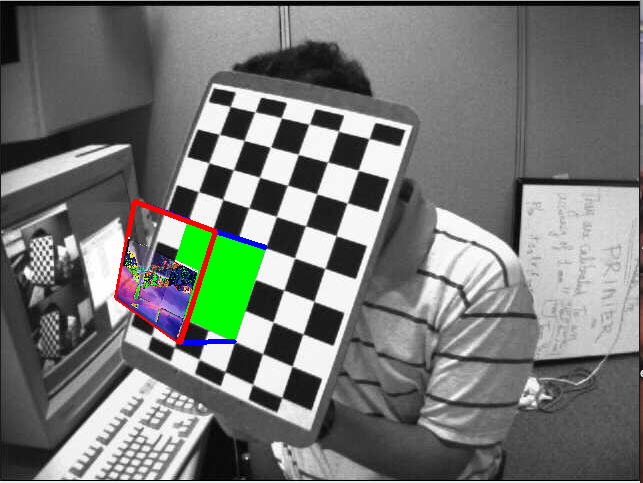

In [64]:
#Since the outputs are generated externally, I'm attaching them to this notebook for reference

from IPython.display import display
from PIL import Image


path1="checkerboards/Result/1.png"
path2="checkerboards/Result/2.png"
path3="checkerboards/Result/3.png"
path4="checkerboards/Result/4.png"
path5="checkerboards/Result/5.png"
path6="checkerboards/Result/6.png"
path7="checkerboards/Result/7.png"
display(Image.open(path1))
display(Image.open(path2))
display(Image.open(path3))
display(Image.open(path4))
display(Image.open(path5))
display(Image.open(path6))
display(Image.open(path7))
                   